# 비대칭 데이터 정규화

## 비대칭 정규화 함수

In [ ]:
# distplot 함수 
def distplot_check (cols):
    cols_len = len(cols)
    if cols_len % 2 == 0 :
        row_size = (cols_len // 2)
    else : 
        row_size = (cols_len // 2) + 1

    fig, axes = plt.subplots(row_size, 2, figsize=(25, 15))
    plt.subplots_adjust(wspace=0.3,  hspace=0.7)
    sns.set_theme(style="white", context="talk")
    row, col = 0, 0

    for sca_col in cols: 
        df_sca = data_DF[sca_col].values

        if col > 1:
            row += 1
            col = 0
            sns.distplot(df_sca, ax=axes[row, col])
            axes[row, col].set_title(sca_col)
            col += 1

        else : 
            sns.distplot(df_sca, ax=axes[row, col])
            axes[row, col].set_title(sca_col)
            col += 1      

In [ ]:
# 비대칭 데이터 확인 
def skewed_check (date, col):
    skewness = date[col].apply(lambda x : x.skew()).sort_values(ascending=False)
    sk_df = pd.DataFrame(skewness, columns = ["skewness"])
    sk_df.sort_values(by="skewness", ascending=False)
    sk_df["skw"] = abs(sk_df["skewness"])
    sk_df = sk_df.sort_values(by="skw", ascending=False).drop("skewness", axis=1)
    skw_features = np.unique(sk_df[sk_df.skw > 0.5].index)
    return skw_features

## 비대칭 데이터 확인

In [ ]:
# 비대칭 데이터(Skewed Data) 확인 
pre_col = ['AVRG_TMPRT', 'DAY_RAINQTY', 'DAY_MSNF', 'AVRG_WS', 'AVRG_HUMIDITY', 'INDUSTRIAL_CNT', 'BAR_CNT', \
           'SENIOR_CENTER_CNT', 'RESTAURANT_CNT', 'BULID_PERMIT_CNT', 'ACCIDENT_AREA_CNT', 'ALL_POP', 'ELDER_POP']
skewness = data_DF[pre_col].apply(lambda x : x.skew()).sort_values(ascending=False)
sk_df = pd.DataFrame(skewness, columns = ["skewness"])
sk_df.sort_values(by="skewness", ascending=False)
sk_df["skw"] = abs(sk_df["skewness"])
sk_df = sk_df.sort_values(by="skw", ascending=False).drop("skewness", axis=1)
sk_df

,skw
INDUSTRIAL_CNT,16.024124
BAR_CNT,12.471664
DAY_MSNF,7.893618
ELDER_POP,5.958059
BULID_PERMIT_CNT,5.695399
RESTAURANT_CNT,5.256405
DAY_RAINQTY,5.156004
ALL_POP,4.820455
SENIOR_CENTER_CNT,3.861760
ACCIDENT_AREA_CNT,3.822254


In [ ]:
# 절대값 0.5 사이의 값은 적당히 잘 분포
skw_features = np.unique(sk_df[sk_df.skw > 0.5].index)
skw_features

array(['ACCIDENT_AREA_CNT', 'ALL_POP', 'AVRG_WS', 'BAR_CNT',
       'BULID_PERMIT_CNT', 'DAY_MSNF', 'DAY_RAINQTY', 'ELDER_POP',
       'INDUSTRIAL_CNT', 'RESTAURANT_CNT', 'SENIOR_CENTER_CNT'],
      dtype=object)

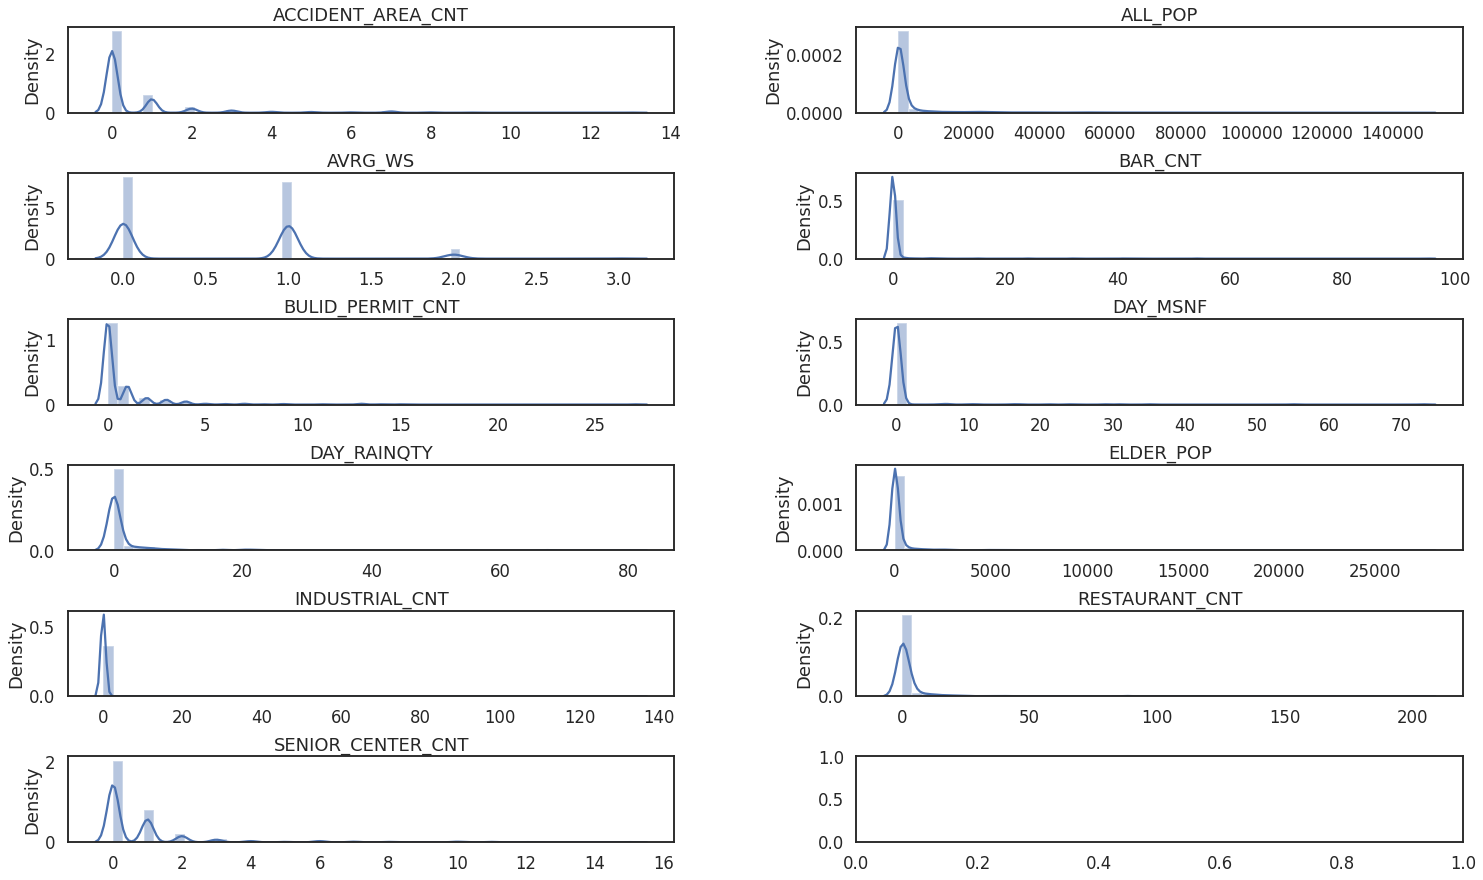

In [ ]:
# Box-Cox Transform 처리 전 분포 확인 
distplot_check(skw_features)           

## 비대칭 정규화 수행

In [ ]:
# Box-Cox Transform
lam = 0.01

for col in skw_features:
  data_DF[col] = boxcox1p(data_DF[col], lam)

trans_skewness = data_DF[skw_features].apply(lambda x : x.skew()).sort_values(ascending=False)
trans_sk_df = pd.DataFrame(trans_skewness, columns = ["skewness"])
trans_sk_df.sort_values(by="skewness", ascending=False)
trans_sk_df["skw"] = abs(trans_sk_df["skewness"])
trans_sk_df = trans_sk_df.sort_values(by="skw", ascending=False).drop("skewness", axis=1)
trans_sk_df

,skw
INDUSTRIAL_CNT,7.658677
BAR_CNT,6.502235
DAY_MSNF,4.825624
DAY_RAINQTY,2.188445
RESTAURANT_CNT,2.026323
ACCIDENT_AREA_CNT,1.923127
BULID_PERMIT_CNT,1.889636
SENIOR_CENTER_CNT,1.590027
ELDER_POP,0.834945
ALL_POP,0.488207


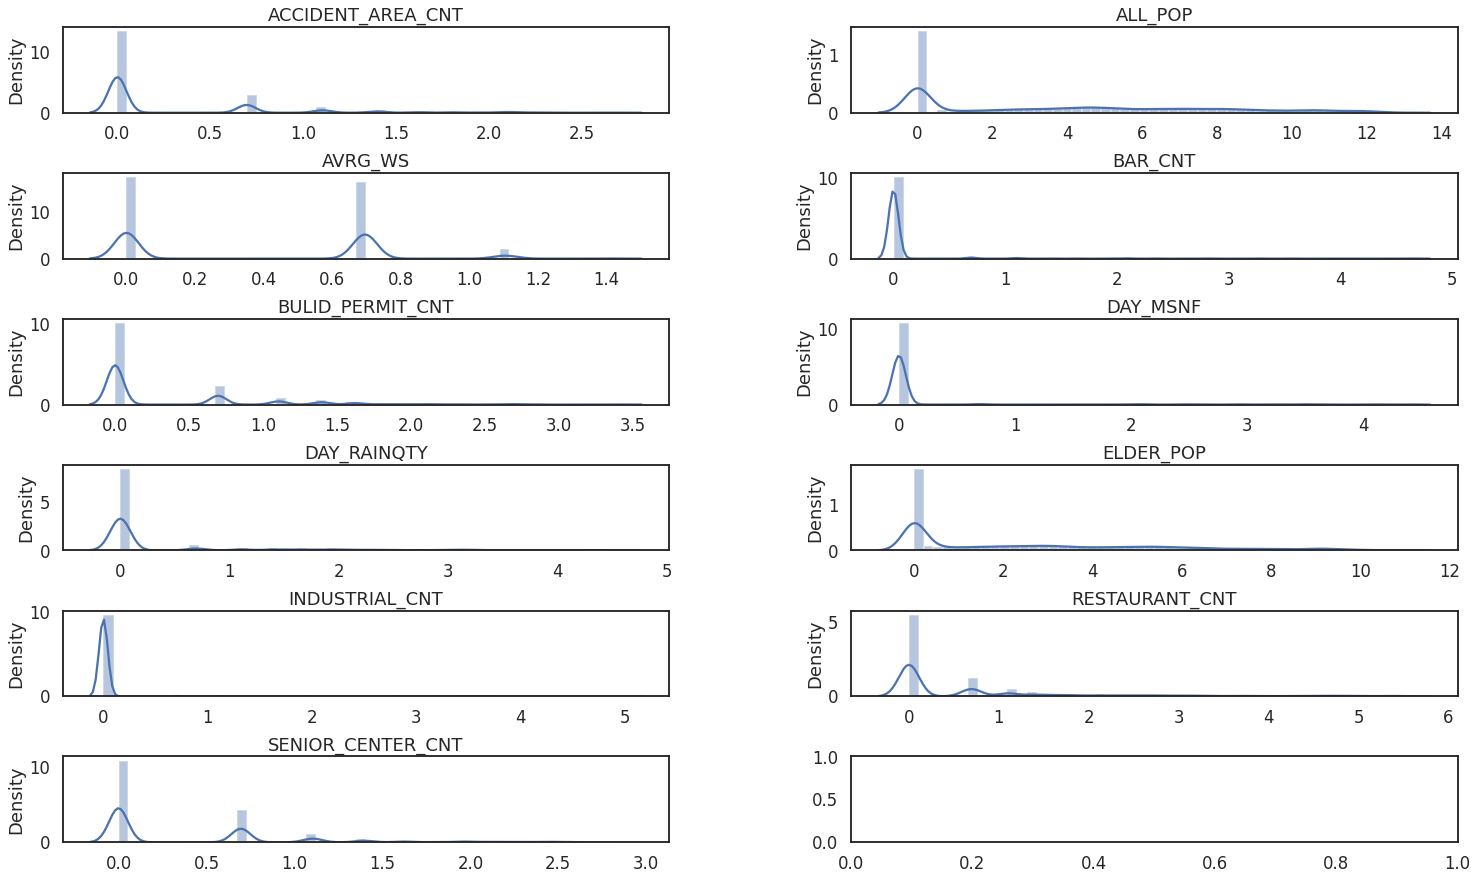

In [ ]:
# Box-Cox를 Transform 한 후 분포 확인 
distplot_check(skw_features)